### Lab-5 Report
By: Aniket Tiwari   
ID: 8866818

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
diabetes_x, diabetes_y = datasets.load_diabetes(as_frame=True, scaled=False, return_X_y=True)
diabetes_x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0


In [4]:
diabetes = pd.concat([diabetes_x, diabetes_y], axis=1)
diabetes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [5]:
diabetes.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


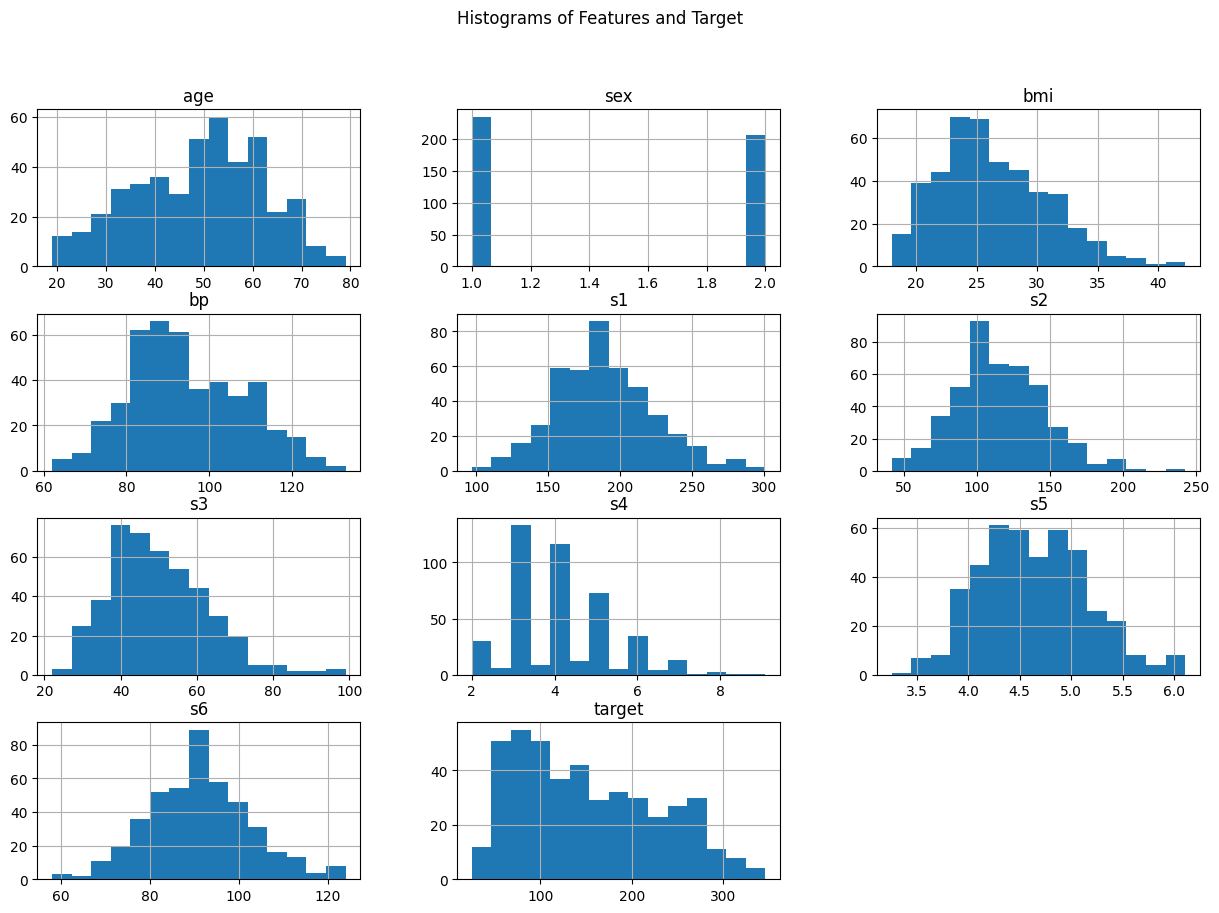

In [6]:
diabetes.hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Features and Target')
plt.show()

- **Age**: The distribution is reasonably symmetrical, indicating that the age distribution in the dataset is normal.   
- **Sex**: A binary categorical variable (i.e., male and female) is displayed in the histogram.   
- **BMI**: Seems to be right-skewed, meaning that fewer people have high BMI values and more people have lower BMI values.   
- **Serum measurements (s1, s2, s3, s4, s5, s6) and blood pressure (bp)**: Although some of these measures have longer tails, indicating slight skewness, these features often display symmetric distributions.   
- **Target (Diabetes Progression)**: The target variable has a large tail towards higher values and is right-skewed, suggesting that some people have very high disease progression measures whereas the majority have lower measures.   

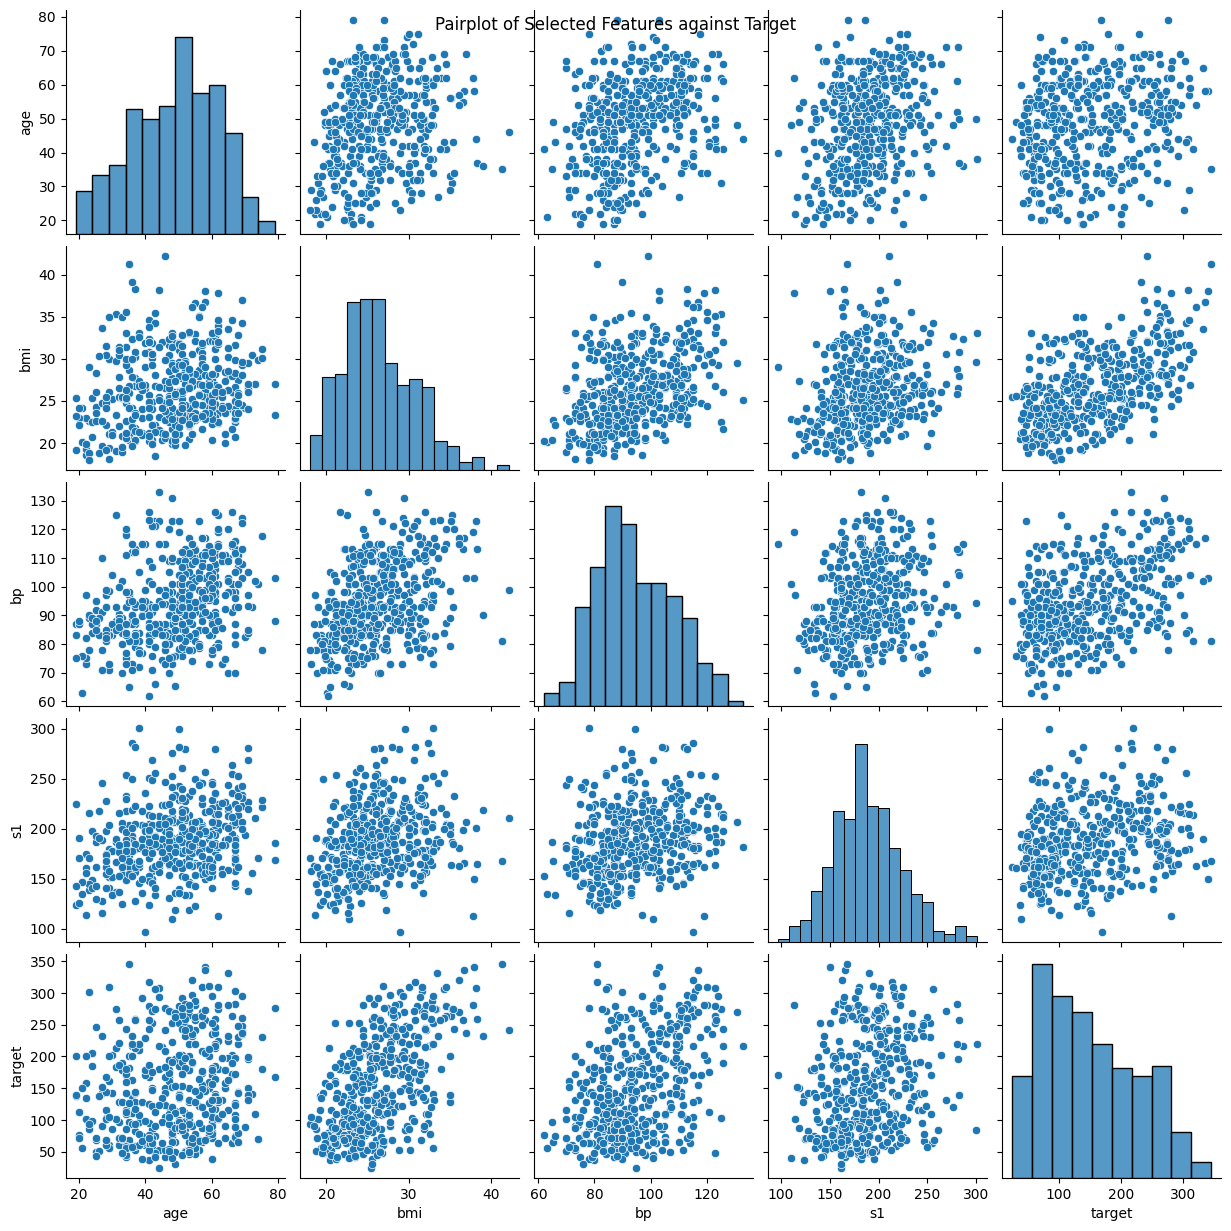

In [7]:
sns.pairplot(diabetes, vars=['age', 'bmi', 'bp', 's1', 'target'])
plt.suptitle('Pairplot of Selected Features against Target')
plt.show()

- **Age and BMI**: The distribution of age and BMI is quite normal; there is no obvious linear association with the goal variable.    
- **Blood Pressure (bp):** The scatter plot density shows a small correlation between higher blood pressure measurements and greater diabetes progression.   
- **Serum Measurements (s1, s2, s3, s4, s5)**: Denser scatter plots show an upward trend, suggesting that certain serum measurements have a moderately favorable connection with the aim.   
- **Target Variable**: The diabetes progression measure distribution is right-skewed, with a greater concentration of people at lower levels of progression and a smaller number at higher levels.    
- **Scatter Plots**: No single feature exhibits a significant linear correlation with the target, indicating that non-linear models or feature interactions may be more effective in capturing the relationships seen in the data.    

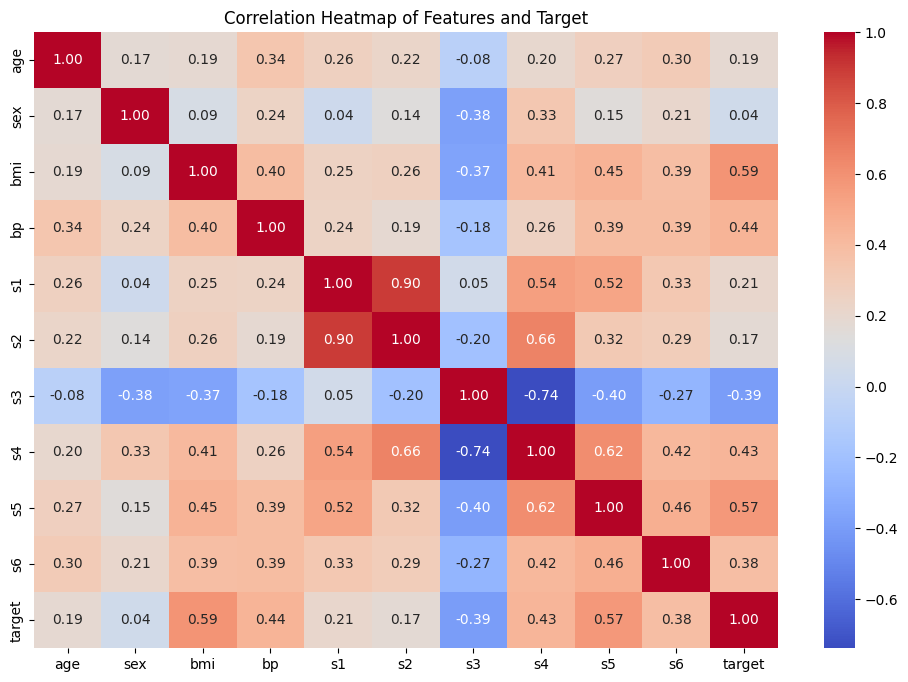

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(diabetes.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features and Target')
plt.show()

In [9]:
correlation_matrix = diabetes.corr()
target_correlation = correlation_matrix["target"].drop("target").abs().sort_values(ascending=False)
top_6_features_correlation = target_correlation.head(6)
top_6_features_correlation



bmi    0.586450
s5     0.565883
bp     0.441482
s4     0.430453
s3     0.394789
s6     0.382483
Name: target, dtype: float64

- **BMI (0.586450)**: The target variable and BMI had the strongest positive correlation (0.586450), suggesting a substantial association between higher BMI and faster progression of diabetes.   

- **Strong positive correlation is also seen in S5 (0.565883)**: indicating a significant relationship between this serum measurement and the advancement of diabetes.   

- **Blood Pressure (bp) (0.441482)**: Shows a somewhat positive connection with the aim, suggesting that measurements of illness development may be more closely linked to elevated blood pressure values.   

- **S4 (0.430453)**: Shows a somewhat positive correlation with the goal, implying that the target variable and this serum parameter are related.   

- **S3 (-0.394789)**: This feature has a moderately negative connection with the aim, indicating that decreased diabetes progression may be linked to greater values of this characteristic.   

- **S6 (0.382483)**: Shows a somewhat favorable connection with the objective, suggesting that it may be useful in forecasting the course of diabetes.   

In [10]:
correlation_matrix = diabetes_x.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
tri_df = correlation_matrix.mask(mask)

stacked = tri_df.stack().reset_index()
stacked.columns = ['Feature 1', 'Feature 2', 'Correlation']
sorted_list = stacked.loc[(abs(stacked['Correlation']).sort_values(ascending=False)).index]
sorted_list.head(10)

,Feature 1,Feature 2,Correlation
14,s2,s1,0.896663
27,s4,s3,-0.738493
26,s4,s2,0.659817
35,s5,s4,0.617859
25,s4,s1,0.542207
32,s5,s1,0.515503
44,s6,s5,0.464669
30,s5,bmi,0.446157
43,s6,s4,0.417212
23,s4,bmi,0.413807


- **s2 and s1 (0.896663)**: exhibit a strong positive correlation, indicating the possibility of redundant information. Since they are both serum measurements, it is possible that they represent comparable biological situations or processes.   

- **s4 and s3 (-0.738493)**: has a robust negative association. Low s3 levels are correlated with high s4 values, and vice versa. This inverse relationship in the body's metabolism may be a sign of an inverse biological link or compensatory mechanism.   

- **S4's significant positive correlations with both s2 and s1 (0.659817) and s1 (0.542207)**: suggest that s4 and these serum measures may be related to similar metabolic indicators or processes.   

- **s5 with s4 (0.617859) and s1 (0.515503)**: s5 also exhibits a moderate positive correlation with s1 and a significant positive correlation with s4, indicating that there may be overlap in the mechanisms influencing the evolution of diabetes that affect these serum parameters.      

- **s6 with s5 (0.464669)**: This somewhat positive correlation points to a possible connection between the two measurements, which could point to a shared function in the course of the illness.   

- S5 and S4 have moderately positive associations with BMI (0.446157 and 0.413807, respectively), connecting these serum measures to body weight, a known risk factor for diabetes.

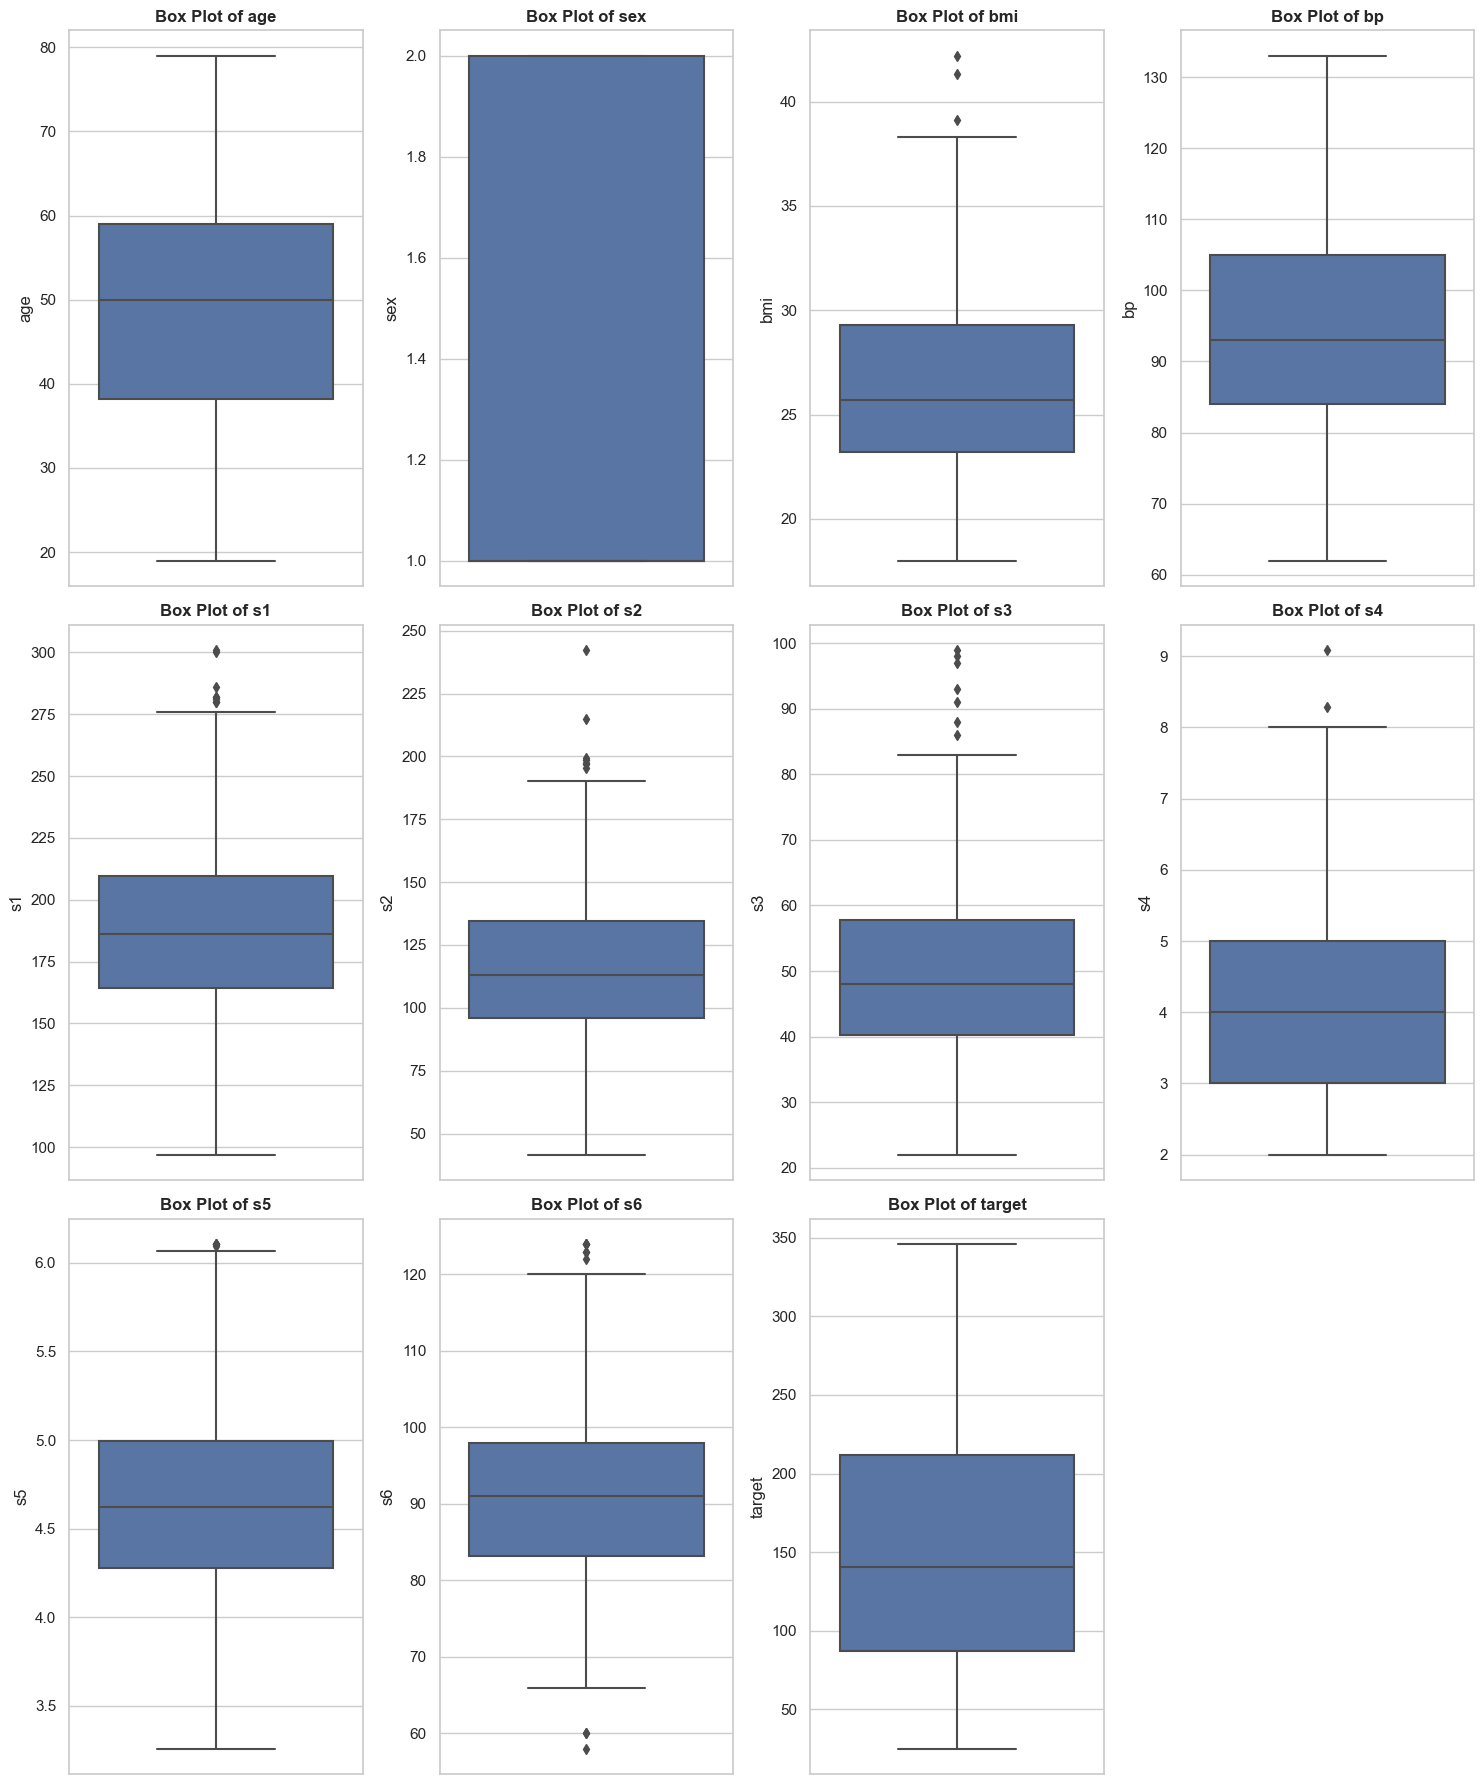

In [11]:
numerical_columns = diabetes.select_dtypes(include=['float64', 'int64']).columns

num_cols = 4
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols
plt.figure(figsize=(15, num_rows * 6))
sns.set(style="whitegrid")

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=diabetes[column])
    plt.title(f'Box Plot of {column}', fontweight='bold')

plt.tight_layout()
plt.show()

- The points outside the box plots' whiskers indicate the presence of outliers in the target variable and a number of attributes (s1, s2, s3, s4, s5, s6). This implies that a subset of the population has serum measures and illness progression levels that differ markedly from the rest, and if these differences are not appropriately addressed, this could have an impact on the model's performance. To make sure that these points don't distort the outcomes of the regression models you plan to create, it could be essential to take outlier detection and treatment techniques into account.  

In [12]:
x_train, x_test, y_train, y_test = train_test_split(diabetes_x, diabetes_y, test_size=0.2, random_state=43)

In [13]:
scoring = {
    'r2':'r2',
    'MAE': make_scorer(mean_absolute_error),
    'MAPE': make_scorer(mean_absolute_percentage_error)
}

In [14]:
models={
    'Poly_deg_2': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    'Poly_deg_3': make_pipeline(PolynomialFeatures(degree=3), LinearRegression()),
    'DecisionTree_depth_3': DecisionTreeRegressor(max_depth=3),
    'DecisionTree_depth_5': DecisionTreeRegressor(max_depth=5),
    'kNN_3': KNeighborsRegressor(n_neighbors=3),
    'kNN_5': KNeighborsRegressor(n_neighbors=5)
}

In [15]:
cv_results = {}
for name, model in models.items():
    cv_results[name] = cross_validate(model, x_train, y_train, cv=5, scoring=scoring)
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [16]:
data_list = []
for name, result in cv_results.items():
    data_list.append({
        'Model': name,
        'R-Squared Mean': np.mean(result['test_r2']),
        'R-Squared Std': np.std(result['test_r2']),
        'MAE Mean': np.mean(result['test_MAE']),
        'MAE Std': np.std(result['test_MAE']),
        'MAPE Mean': np.mean(result['test_MAPE']),
        'MAPE Std': np.std(result['test_MAPE'])
    })

summary_table = pd.DataFrame(data_list)


In [17]:
summary_table

,Model,R-Squared Mean,R-Squared Std,MAE Mean,MAE Std,MAPE Mean,MAPE Std
0,Poly_deg_2,0.174158,0.264293,52.527695,7.716442,0.449469,0.068326
1,Poly_deg_3,-1985.849937,2207.533698,1046.482969,226.622719,7.907839,1.327172
2,DecisionTree_depth_3,0.359818,0.116733,48.658868,5.422610,0.424806,0.077609
3,DecisionTree_depth_5,0.231771,0.162004,51.741567,5.036123,0.429916,0.048630
4,kNN_3,0.094152,0.072506,59.575426,4.045166,0.523622,0.049830
5,kNN_5,0.174202,0.071044,56.709755,3.801611,0.503196,0.060880


- **Strong correlations observed between serum measurements** (s1, s2, s3, s4, s5, s6) indicate the possibility of multicollinearity, which may have an effect on some models, especially linear ones such as Polynomial Regression.  

- **Important Predictors**: The parameters that have the strongest correlations with the diabetes progression target are BMI and s5, suggesting their significance as predictors in the models.  

- **Best Model Performance**: Based on a relatively small standard deviation in both R-Squared and MAE, the DecisionTree with a depth of 3 has the highest R-Squared Mean of all the models, indicating that it is the best at capturing the variability in the target variable without overfitting.

- **Data Distribution**: The target variable has a right-skewed distribution and the age variable has a somewhat normal distribution, both of which may affect model performance and call for transformations or robust regression procedures.   

- **Outliers**: In order to increase model accuracy, preprocessing measures may be necessary to address outliers that are revealed by box plots in a number of characteristics and the target variable.


In [18]:
best_model_name = summary_table.sort_values(by='R-Squared Mean', ascending=False).iloc[0]['Model']
print(f"Best Model: {best_model_name}")

Best Model: DecisionTree_depth_3


In [22]:
best_model = models[best_model_name]
best_model.fit(x_train, y_train)
y_pred_test = best_model.predict(x_test)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print(f"Test R-Squared: {r2_test:.2f}")
print(f"Test MAE: {mae_test:.2f}")
print(f"Test MAPE: {mape_test:.2f}")


Test R-Squared: 0.40
Test MAE: 48.46
Test MAPE: 0.42


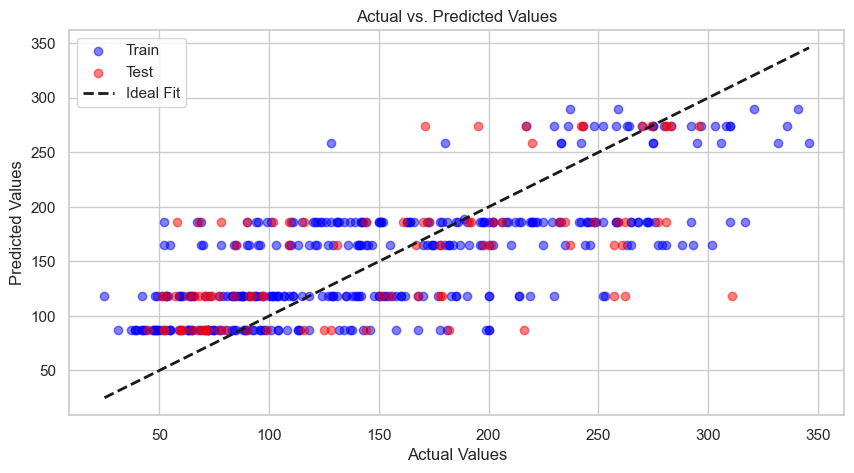

In [ ]:
y_pred_train = best_model.predict(x_train)
plt.figure(figsize=(10, 5))
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.5, label='Train')
plt.scatter(y_test, y_pred_test, color='red', alpha=0.5, label='Test')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, label='Ideal Fit')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


- **Synopsis of Performance**: The R-Squared score indicates that the model has moderate accuracy in predicting the course of diabetes disease.
The distribution of anticipated vs. actual values indicates that the model is quite consistent, however there are certain regions where the predictions of the model differ more from the actual values, especially for higher values of the goal.   

- **Limitations of the Model and Failure Analysis**: The locations that greatly depart from the optimum fit line reveal some limits of the DecisionTree_depth_3 model, namely in capturing the entire complexity of the data.
The restricted depth of the tree may prevent the model from capturing more subtle patterns in the data, which could result in underfitting.The performance of the model may also be impacted by outliers in the dataset, as seen by the box plots. In the event that these outliers correspond to significant clinical variations, the model may not be accurately capturing these. While preventing overfitting, the simplicity of the model might not capture all interactions between features. This could be fixed by looking at more complicated models or by creating additional features that more accurately reflect the underlying relationships. The model is constrained by the available data because not all pertinent predictors of diabetes progression may be included in the dataset.   

- **Suggestions for Enhancement**: Examine the reasons behind notable deviations and outliers to determine whether they are meaningful signals, uncommon occurrences, or data errors. To improve fit, investigate more intricate models or gradually deepen the decision tree while keeping an eye out for overfitting. Try using polynomial or interaction terms in your feature engineering experiments to capture more intricate relationships in the data. Think about ensemble techniques that can manage intricate interactions and offer resilience against outliers, such as Random Forest or Gradient Boosting. The predictive power of the model could be improved by gathering more data, including potential variables that aren't in the dataset just yet.   


**Conclusion**
- With a test R-Squared of 0.40, MAE of 48.46, and MAPE of 0.42, the DecisionTree with a depth of 3 (DecisionTree_depth_3) has been shown to be the best-performing model among those that were tested. This shows that 40% of the volatility in the target variable can be explained by the model, and that the average prediction error is approximately 48.46 units, or 42% of the actual values.  